In [1]:
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [3]:
ds = pd.read_csv('https://raw.githubusercontent.com/LuisSante/Datasets/main/app_reviews.csv')
ds

,package_name,review,date,star
0,com.mantz_it.rfanalyzer,Great app! The new version now works on my Bra...,October 12 2016,4
1,com.mantz_it.rfanalyzer,Great It's not fully optimised and has some is...,August 23 2016,4
2,com.mantz_it.rfanalyzer,Works on a Nexus 6p I'm still messing around w...,August 04 2016,5
3,com.mantz_it.rfanalyzer,The bandwidth seemed to be limited to maximum ...,July 25 2016,3
4,com.mantz_it.rfanalyzer,Works well with my Hackrf Hopefully new update...,July 22 2016,5
...,...,...,...,...
288060,com.termux.api,it doesn't do anything after installing this i...,June 24 2016,3
288061,com.termux.api,I like this app . Its is very helpful for use....,June 20 2016,5
288062,com.termux.api,Finally Brings back the Unix command line to A...,May 20 2016,5
288063,com.termux.api,The API feature is great just need loads more...,May 05 2016,5


In [4]:
list_ = []  
for i in range(len(ds['package_name'].unique())):
    ds_aux = ds.loc[ds['package_name'] == ds['package_name'].unique()[i]]
    #rescatamos en list_ los packages names unicos de todo el dataset
    list_.append({'package_name':ds['package_name'].unique()[i], 'size': len(ds_aux)})

#ordenamos de acuerdo al numero de datos de cada package name (de mayor a menor)
list_ = sorted(list_, key=lambda x: x['size'], reverse=True)

#seleccionamos el package name # 40 y almacenamos los reviews en el corpus
df = ds[ds['package_name'] == list_[40]['package_name']]
corpus = list(df['review'])

corpus_ds = {
    'Sentences' : corpus
}

ds_new = pd.DataFrame(corpus_ds)
print(ds_new)

                                              Sentences
0     Amazing Its great but can someone explain to m...
1     Seems this is one of the best app although I d...
2     Great; needs material design UI. Please use ma...
3                                             Great app
4                                          Cathy Female
...                                                 ...
1090  First time experimenting with this theorpy in ...
1091  Tried and true...no frills without the bells a...
1092                            One of the best so far.
1093              I quit smoking with the self hypnosis
1094   Helps me focus on work with kids running around!

[1095 rows x 1 columns]


In [5]:
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [6]:

def best_cluster_agglomerative(j):
    best_k = 0
    best_average = 0
    for k in range(2,j):

        agglomerative_clusterering = AgglomerativeClustering(n_clusters=k, affinity="cosine" , linkage="complete")
        cluster_labels = agglomerative_clusterering.fit_predict(corpus_embeddings)

        silhouette_avg = silhouette_score(corpus_embeddings, cluster_labels)
    
        if(silhouette_avg > best_average): 
            best_average = silhouette_avg
            best_k = k
            #ds_new['clusters'] = cluster_labels

        #print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)
        #print(cluster_labels)

      ##print("best avg: ", best_average)
      ##print("best k: ", best_k)

    return best_k, best_average

In [20]:
best_k_HC, best_average_HC = best_cluster_agglomerative(40)
print(best_k_HC)

39


In [29]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(corpus_embeddings)
print(X_principal)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

[[ 0.02151178 -0.259799  ]
 [-0.22084009  0.1444758 ]
 [ 0.14483976  0.1498028 ]
 ...
 [ 0.2637112   0.09590002]
 [ 0.06832112 -0.254652  ]
 [ 0.12118403 -0.06903564]]


In [22]:
classes = []
for i in range(best_k_HC):
    classes.append('clusters '+ str(i+1))
print(classes)

['clusters 1', 'clusters 2', 'clusters 3', 'clusters 4', 'clusters 5', 'clusters 6', 'clusters 7', 'clusters 8', 'clusters 9', 'clusters 10', 'clusters 11', 'clusters 12', 'clusters 13', 'clusters 14', 'clusters 15', 'clusters 16', 'clusters 17', 'clusters 18', 'clusters 19', 'clusters 20', 'clusters 21', 'clusters 22', 'clusters 23', 'clusters 24', 'clusters 25', 'clusters 26', 'clusters 27', 'clusters 28', 'clusters 29', 'clusters 30', 'clusters 31', 'clusters 32', 'clusters 33', 'clusters 34', 'clusters 35', 'clusters 36', 'clusters 37', 'clusters 38', 'clusters 39']


In [24]:
clustering_model = AgglomerativeClustering(n_clusters=best_k_HC, affinity="cosine" , linkage="complete") #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(X_principal)
cluster_assignment = clustering_model.labels_
ds_new['clusters'] = cluster_assignment
print(cluster_assignment)

[17  2  0 ... 16 26 27]


In [25]:
ds_new = ds_new.sort_values(by=['clusters','Sentences'])
ds_new

,Sentences,clusters
805,A must have with traveling I travel 40 to 45 w...,0
445,Did your icon change? I have sworn by this app...,0
950,Enjoying I'm enjoying this app! I hope it cont...,0
1028,Excellent App and Perfect Opportunity This is ...,0
340,Great Awesome,0
...,...,...
35,Love it More comprehensive then other binaural...,38
8,Notbad I like this app,38
115,Simple effective and neat,38
365,Works a treat I'm recovering from surgery and ...,38


In [26]:
count = 0
for i in ds_new['Sentences'][ds_new['clusters'] == 0]:
    print(count , i ,end="\n")
    count+=1

0 A must have with traveling I travel 40 to 45 weeks a year  the sleep rhythms are excellent  doesn't matter what time zone I am in I fall asleep in minutes.
1 Did your icon change? I have sworn by this app for years  but recall a different logo. I download this app in every device I get  everyone should. When I was in terrible pain  or dealing with my constant insomnia  this app is my trusty go to. Reliable and effective. Muah!
2 Enjoying I'm enjoying this app! I hope it continues to be authentic and honest.
3 Excellent App and Perfect Opportunity This is an Excellent App and Perfect Opportunity to get involved in making it better.
4 Great Awesome
5 Great app This app helps me to sleep and relax. It's incredible.
6 Hey I didin't tried this yet but i hope it will work.
7 Love this app 
8 Love this app.
9 Nag screen Has an annoying nag screen... You should warn your users about it. The one on F-droid is not having this problem but it is a way buggier
10 Outstanding Have made it a part o

                                              Sentences  clusters    colors
805   A must have with traveling I travel 40 to 45 w...         0  0.435897
445   Did your icon change? I have sworn by this app...         0  0.051282
950   Enjoying I'm enjoying this app! I hope it cont...         0  0.000000
1028  Excellent App and Perfect Opportunity This is ...         0  0.230769
340                                       Great Awesome         0  0.256410
...                                                 ...       ...       ...
35    Love it More comprehensive then other binaural...        38  0.692308
8                                Notbad I like this app        38  0.282051
115                          Simple  effective and neat        38  0.410256
365   Works a treat I'm recovering from surgery and ...        38  0.666667
889                                                 Yes        38  0.692308

[1095 rows x 3 columns]


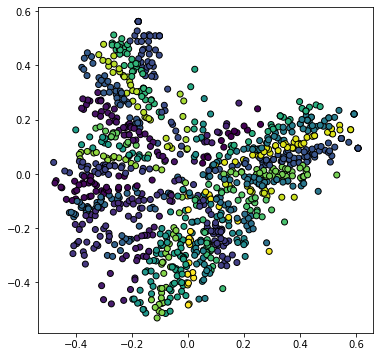

In [27]:
ds_new['colors'] = cluster_assignment.astype(float) / best_k_HC
print(ds_new)
plt.figure(figsize =(6,6))


scatter = plt.scatter(X_principal['P1'], X_principal['P2'], c=ds_new['colors'],edgecolor='k')
plt.show()